In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator,MultipleLocator,FuncFormatter
def find(txt, tar):
    idx = txt.find(tar)
    rtxt = txt[idx + len(tar):]
    return float(rtxt.split(', ')[0])

def find_data_name(txt, tar):
    idx = txt.find(tar)
    rtxt = txt[idx + len(tar):]
    txts = rtxt.split('/')
    for t in txts:
        if 'hard' in t or 'mid' in t or 'simple' in t:
            return t
    return ''

In [2]:
def get_res(log_file):
    losses = []
    rvalues = []
    rrmses = []
    tlosses = []
    dataset = ''
    with open(log_file, 'r') as f:
        lines = f.readlines()
        print(len(lines))
        for line in lines:
            if 'validation' in line:
                tar = 'loss = '
                loss = find(line, tar)
                tar = 'rvalue = '
                rvalue = find(line, tar)
                tar = 'rrmse = '
                rrmse = find(line, tar)

                losses.append(loss)
                rvalues.append(rvalue)
                rrmses.append(rrmse)
            elif 'epoch' in line and 'lr' in line and 'ckpt' not in line:
                tar = 'loss = '
                loss = find(line, tar)
                tlosses.append(loss)
            if 'Create dataset to following files' in line:
                tar = 'first = '
                dataset = find_data_name(line, tar)

    losses = np.array(losses)
    rvalues = np.array(rvalues)
    rrmses = np.array(rrmses)
    tlosses = np.array(tlosses)
    print('dataset = ', dataset)
    return losses, rvalues, rrmses, tlosses

306062
dataset =  


Text(0.5, 1.0, 'train loss')

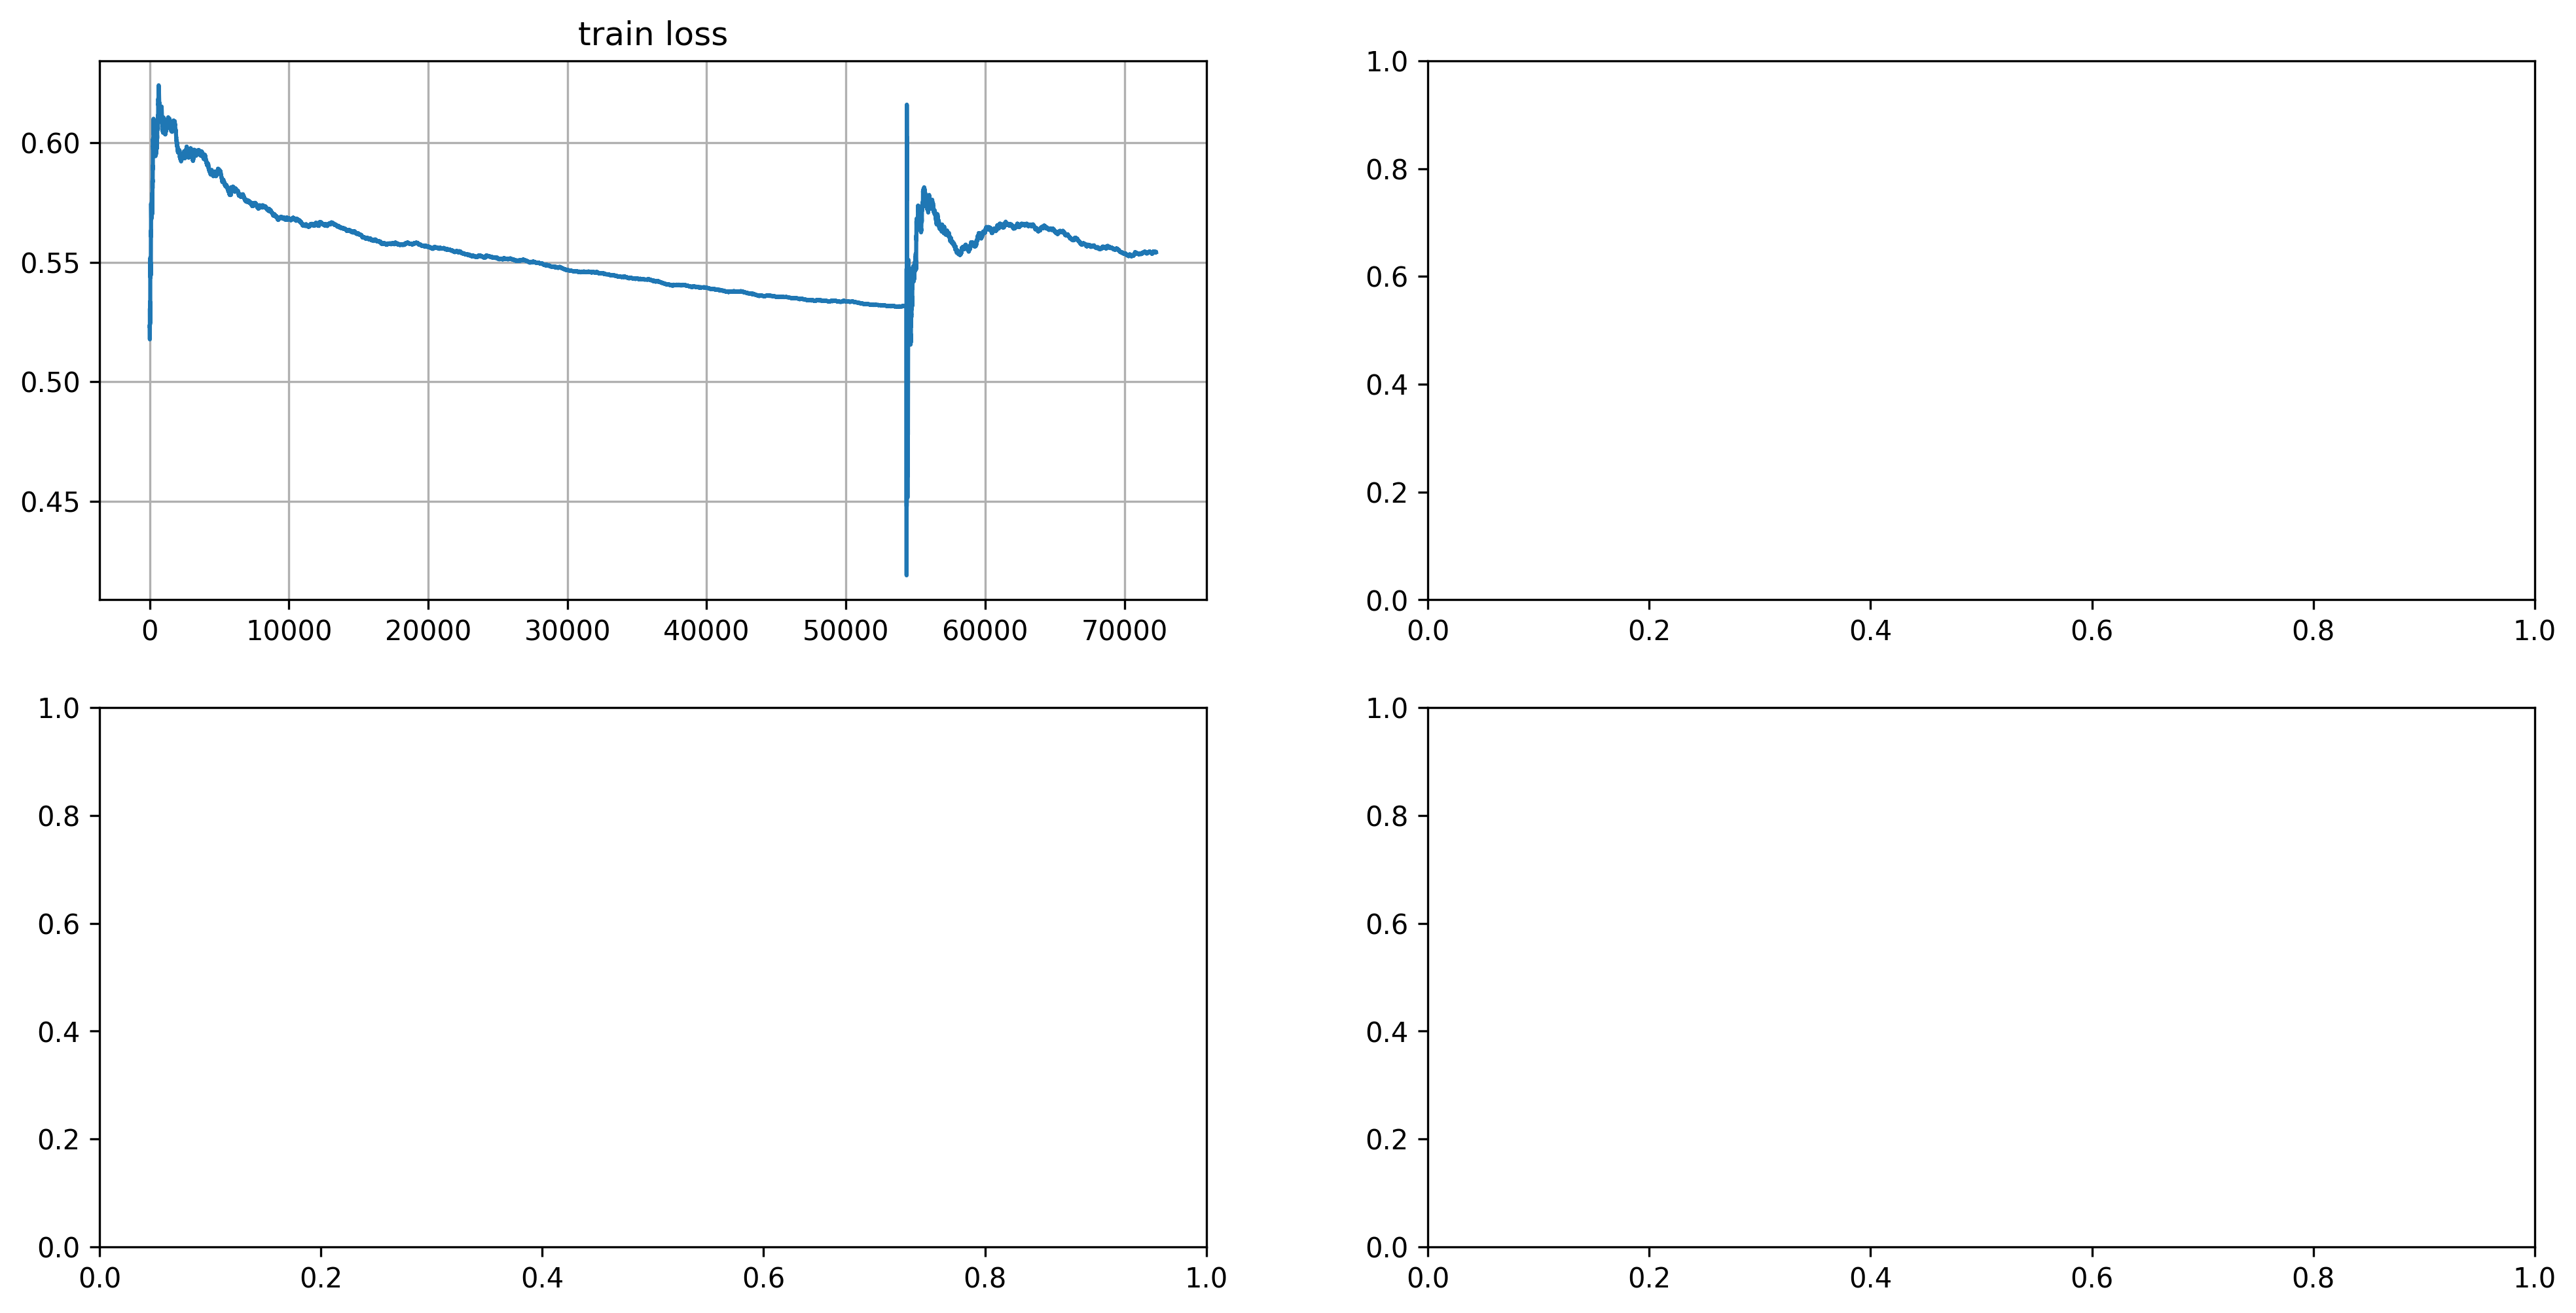

In [14]:
log_file = '../output/dd_ptrain_01.log'
threshold = 20.
losses, rvalues, rrmses, tlosses = get_res(log_file)

tlosses = tlosses[tlosses > 0.4]

fig, axs = plt.subplots(2, 2, figsize=(16, 8), dpi=300)
axs[0, 0].plot(tlosses[100:])
axs[0, 0].grid()
axs[0, 0].set_title('train loss')